In [134]:
import json 
import pandas as pd 
import datetime as dt 
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt 
%matplotlib inline 

### loading data login data 
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [3]:
with open("logins.json","r") as f:
    login_time = json.load(f)

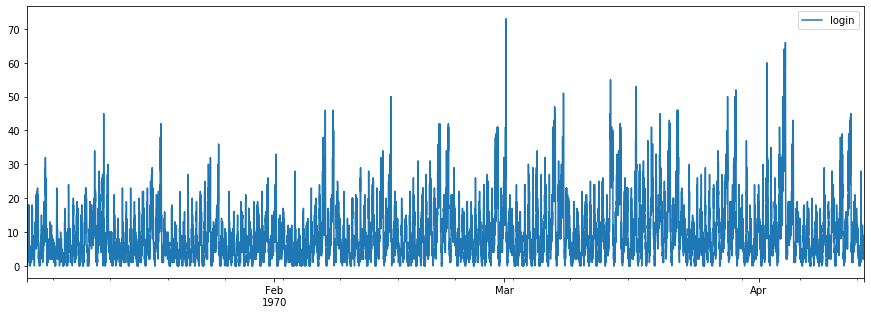

In [4]:
sample = pd.DataFrame(index = pd.DatetimeIndex(login_time['login_time']))
sample["login"] = 1

sample.resample("15T").sum().plot(figsize = (15,5))
plt.show()

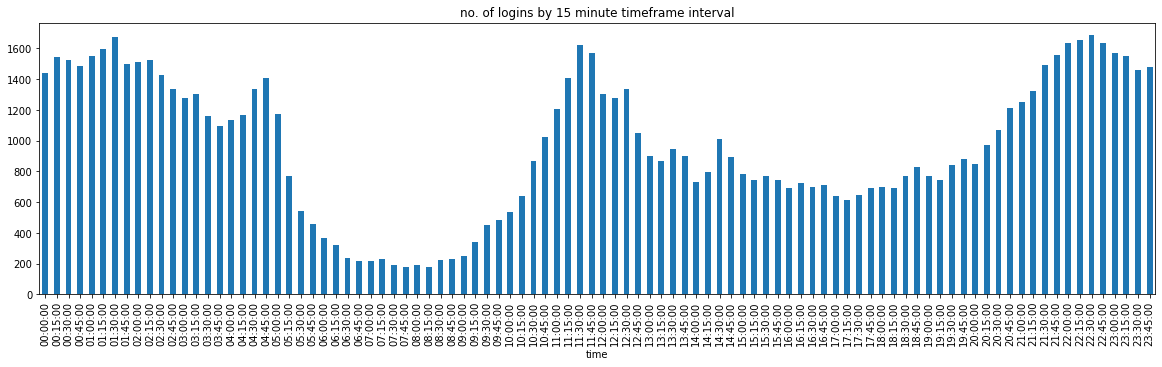

In [38]:
s = sample.resample("15T").sum()
s["time"] = s.index.time
s["weekday"] = s.index.weekday

s.groupby('time').login.sum().plot(kind = "bar",figsize = (20,5))
plt.title("no. of logins by 15 minute timeframe interval")
plt.show()

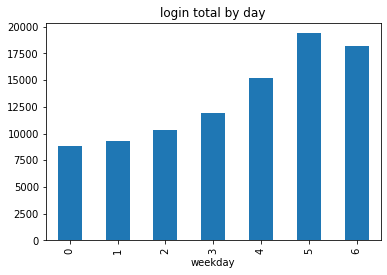

In [41]:
s.groupby("weekday").login.sum().plot(kind = "bar")
plt.title("login total by day")
plt.show()

* so the patterns noticed, in general, seeing above plots are as follows:
* demand is less in periods from 3 am to 10 am
* from 9 am onward login increases rapidly 
* login generally peak around from 11 am to 12 
* demand again is stagnant from 2:30 to 7 pm  
* demand is genrally higher on weekends than weekdays

### Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

              a.  how you will implement the experiment
              b.  what statistical test(s) you will conduct to verify the significance of the observation
              c.  how you would interpret the results and provide recommendations to the city operations team along with 
                  any caveats.



so will be having pre expiriment and post experiment data availble with us 

1. for me the key metric of success would be less downtime for drivers to make sure drivers our not spending much time in search of customers. if there is less down time then then there will be less surge in prices and that can help greatly in user retention as user would prefer cab services that have stable charges.

2. expirement i would run is simple hypothesis test of on down time of drivers pre-toll vs. post-toll. 
       * so H0 will be down-time mean pre-toll vs. post-toll has not changed 
       * and H1 will be down-time mean pre-toll vs. post-toll  is less than pre-toll down-time mean 
       * so we will do left tail test for this expiriment 
       
3. so if our mean downtime is below the level of alpha than we can reject the null hypothesis. and infer that down-time mean post-toll has reduced.

### Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).

Data description
* city: city this user signed up in
* phone: primary device for this user
* signup_date: date of account registration; in the form ‘YYYYMMDD’
* last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
* avg_dist: the average distance in miles per trip taken in the first 30 days after signup
* avg_rating_by_driver: the rider’s average rating over all of their trips
* avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
* surge_pct: the percent of trips taken with surge multiplier > 1
* avg_surge: The average surge multiplier over all of this user’s trips
* trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
* ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
* weekday_pct: the percent of the user’s trips occurring during a weekday

In [168]:
with open("ultimate_data_challenge.json","r") as f:
    data = json.load(f)
    
data = pd.DataFrame(data)
data

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [169]:
data["active_time"] = pd.Series(pd.DatetimeIndex(data.last_trip_date) - pd.DatetimeIndex(data.signup_date)) 
data["user_active"] = np.where(data.active_time > dt.timedelta(days = 150),1,0)
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active_time,user_active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143 days,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96 days,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1 days,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170 days,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47 days,0


In [172]:
data.user_active.value_counts(normalize = True)
print("only 24% users are active for more than 150 days from thier signup date")

only 24% users are active for more than 150 days from thier signup date


### EDA

In [173]:
data.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active_time                  0
user_active                  0
dtype: int64

In [174]:
data.dropna(inplace=True)

In [175]:
data.nunique()

city                         3
trips_in_first_30_days      59
signup_date                 31
avg_rating_of_driver        37
avg_surge                  114
last_trip_date             182
phone                        2
surge_pct                  367
ultimate_black_user          2
weekday_pct                664
avg_dist                  2609
avg_rating_by_driver        27
active_time                182
user_active                  2
dtype: int64

In [176]:
data.dtypes

city                               object
trips_in_first_30_days              int64
signup_date                        object
avg_rating_of_driver              float64
avg_surge                         float64
last_trip_date                     object
phone                              object
surge_pct                         float64
ultimate_black_user                  bool
weekday_pct                       float64
avg_dist                          float64
avg_rating_by_driver              float64
active_time               timedelta64[ns]
user_active                         int32
dtype: object

In [181]:
# seeinging user retention by phone 
data.groupby("phone").user_active.value_counts(normalize = True).to_frame()

user_active
phone   user_active             
Android 0               0.856198
        1               0.143802
iPhone  0               0.676445
        1               0.323555

In [183]:
# seeinging user retention by city 
data.groupby("city").user_active.value_counts(normalize = True).to_frame()

user_active
city           user_active             
Astapor        0               0.815752
               1               0.184248
King's Landing 0               0.580741
               1               0.419259
Winterfell     0               0.735504
               1               0.264496

### Preparing Trainaing and Test data 


In [184]:
# converting dtype tp str so dummies method can encode it 
data.ultimate_black_user = data.ultimate_black_user.astype("str")

# preparing encoding training data 
cat_features = ['city','phone','ultimate_black_user']
X_transformed = pd.get_dummies(data[cat_features])

X_numerical = data[['trips_in_first_30_days','avg_rating_of_driver','avg_surge',
                   'surge_pct','weekday_pct','avg_dist','avg_rating_by_driver']]

X = pd.concat([X_numerical,X_transformed],axis = 1)

# getting target data 
y = data.user_active


# splitting data 
X_train,X_test,y_train,y_test = train_test_split(X,y)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31083, 14), (10362, 14), (31083,), (10362,))

### Training and testing Random forest classifier with default Hyperparameters

In [185]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [186]:
clf.score(X_test,y_test)

0.7518818760856978

### Tuning Hyperparamterrs with RandomizedSearchCV

In [153]:
# setting paramater grid
grid = {'n_estimators': [i for i in range(10,200,30)],
          'max_depth': [1,2,3,4,5,6,7,8,9,10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [i for i in range(50,300,50)],
          'min_samples_leaf': [100,200],
          "max_leaf_nodes":[4,5,6,7,8,9,10,12,13]}

grid

{'n_estimators': [10, 40, 70, 100, 130, 160, 190],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [50, 100, 150, 200, 250],
 'min_samples_leaf': [100, 200],
 'max_leaf_nodes': [4, 5, 6, 7, 8, 9, 10, 12, 13]}

In [162]:
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(42)

clf = RandomForestClassifier(n_jobs= 1)
rs_clf = RandomizedSearchCV(clf,
                            param_distributions=grid, 
                            n_iter = 250, # trying 250 random param combination from grid 
                            cv = 5, # setting Kfolds to 5 
                            verbose = 2,
                            refit=True)

rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.6s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, ma

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=4, total=   1.3s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=4, total=   1.5s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=4, total=   1.4s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=4 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=4, total=   1.5s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, ma

[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=8, total=   1.1s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=8 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=8, total=   1.1s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=8 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=8, total=   1.1s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=4, total=   1.0s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_

[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=1 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=1, total=   0.1s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=13, max_features=sqrt, max_depth=6, total=   1.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=13, max_features=sqrt, max_depth=6 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=13, max_features=sqrt, max_depth=6, total=   1.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=13, max_features=sqrt, max_depth=6 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=13, max_features=sqrt, max_depth=6, total=   1.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=13, max_features=sqrt, max_depth=6 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=13, max_features=sqrt, max_depth=6, total=   1.3s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=

[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.7s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.7s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.7s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.7s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth

[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=7 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=7, total=   0.3s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=7 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=7, total=   1.6s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=7 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=7, total=   1.6s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=13, max_features=sqrt, max_depth=

[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   1.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   1.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   1.3s
[CV] n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   1.3s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=7

[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=8, max_features=sqrt, max_depth=2, total=   0.8s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=6 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=6 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=6 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=6, total=   0.1s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=6 
[CV

[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   1.1s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   1.1s
[CV] n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=6 
[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=6, total=   1.1s
[CV] n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_de

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   1.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   1.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   1.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8, total=   1.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=8 
[CV]

[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=5 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=9, max_features=sqrt, max_depth=5, total=   0.5s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.7s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=7 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.8s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=7 

[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   1.2s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   1.2s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   1.2s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=auto, max_depth=3, total=   1.2s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=

[CV]  n_estimators=160, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=7, total=   1.1s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=7, total=   1.4s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=7, total=   1.3s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=7 
[CV]  n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=7, total=   1.3s
[CV] n_estimators=160, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, ma

[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   1.0s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   1.0s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=2, total=   1.0s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3 
[CV]  n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=3, total=   0.7s
[CV] n_estimators=100, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth

[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=2, total=   0.4s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=2, total=   0.4s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=2, total=   0.4s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=2, total=   0.4s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=5, max_features=sqrt, max_depth=2 
[CV]

[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=40, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1 
[CV]  n_estimators=40, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=7, max_features=auto, max_depth=1, total=   0.2s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=10 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=10 
[CV]  n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_depth=10, total=   1.5s
[CV] n_estimators=190, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=8, max_features=sqrt, max_dept

[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=2 
[CV

[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=7, max_features=auto, max_depth=7, total=   0.5s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=8, total=   1.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=8, total=   1.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=8 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=8, total=   1.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=6, total=   1.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=6 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=6, total=   1.2s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=6 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=6, total=   1.3s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=9 
[CV]  n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=9, total=   1.1s
[CV] n_estimators=160, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_dep

[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=5, total=   0.8s
[CV] n_estimators=100, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=1, total=   0.7s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=1 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=1, total=   0.7s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2, total=   1.0s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2, total=   1.0s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_de

[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=1 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=1, total=   0.2s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=1 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=1 
[CV]  n_estimators=40, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=1, total=   0.3s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth

[CV]  n_estimators=130, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=13, max_features=auto, max_depth=4, total=   1.0s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=8 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=8, total=   0.9s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=8 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=8, total=   1.0s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=8 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=8, total=   1.0s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=sqrt, max_depth=8 
[C

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   1.1s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   1.1s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=6 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=6, max_features=auto, max_depth=6, total=   1.1s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[CV]  n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=40, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=8 
[C

[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9, total=   0.3s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9, total=   0.3s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9, total=   0.3s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9, total=   0.3s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=4, max_features=sqrt, max_depth=9 
[CV]

[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=12, max_features=sqrt, max_depth=1, total=   0.6s
[CV] n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=12, max_features=sqrt, max_depth=1 
[CV]  n_estimators=130, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=12, max_features=sqrt, max_depth=1, total=   0.5s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=6 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=6, total=   0.6s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=6 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_depth=6, total=   0.6s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=12, max_features=auto, max_de

[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=8, total=   1.3s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=8 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=8, total=   1.3s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=8 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=8, total=   1.3s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=8 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=8, total=   1.3s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, ma

[CV]  n_estimators=190, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=5, total=   1.4s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3, total=   0.1s
[CV] n_estimators=10, min_samples_split=250, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV

[CV]  n_estimators=10, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=10, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=10, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=10, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=8 
[CV]  n_estimators=10, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=6, max_features=auto, max_depth=8, total=   0.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=5 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=5, total=   0.7s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=auto, max_depth=5 
[

[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=10, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=10, max_features=auto, max_depth=9 
[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=10, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=10, max_features=auto, max_depth=9 
[CV]  n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=10, max_features=auto, max_depth=9, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=10, total=   0.5s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=

[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]  n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5, total=   0.4s
[CV] n_estimators=70, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=4, max_features=auto, max_depth=5 
[CV]

[CV]  n_estimators=100, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=3, total=   0.6s
[CV] n_estimators=100, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=3 
[CV]  n_estimators=100, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=12, max_features=sqrt, max_depth=3, total=   0.6s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=sqrt, max_depth=7 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=sqrt, max_depth=7, total=   1.5s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=sqrt, max_depth=7 
[CV]  n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=sqrt, max_depth=7, total=   1.5s
[CV] n_estimators=190, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=12, max_features=sqrt, max_de

[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=9 
[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=9 
[CV]  n_estimators=10, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=9, total=   0.1s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=2, total=   1.0s
[CV] n_estimators=190, min_samples_split=200, min_samples_leaf=200, max_leaf_nodes=10, max_features=sqrt, max_depth=2

[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=1 
[CV]  n_estimators=10, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=9, max_features=auto, max_depth=1, total=   0.1s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2, total=   0.4s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2 
[CV]  n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2, total=   0.4s
[CV] n_estimators=70, min_samples_split=100, min_samples_leaf=100, max_leaf_nodes=10, max_features=sqrt, max_depth=2 
[C

[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=10 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=10 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=10 
[CV]  n_estimators=160, min_samples_split=200, min_samples_leaf=100, max_leaf_nodes=12, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=10, min_samples_split=100, min_samples_leaf=200, max_leaf_nodes=5, max_features=au

[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=13, max_features=auto, max_depth=5, total=   1.0s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=3, total=   1.0s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=3, total=   1.0s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=3 
[CV]  n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth=3, total=   1.0s
[CV] n_estimators=160, min_samples_split=250, min_samples_leaf=100, max_leaf_nodes=6, max_features=sqrt, max_depth

[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=8 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=8 
[CV]  n_estimators=40, min_samples_split=150, min_samples_leaf=100, max_leaf_nodes=10, max_features=auto, max_depth=8, total=   0.3s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=6 
[CV]  n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=6, total=   0.9s
[CV] n_estimators=130, min_samples_split=50, min_samples_leaf=200, max_leaf_nodes=6, max_features=sqrt, max_depth=6 

[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 14.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [155]:
rs_preds = rs_clf.predict(X_test)

In [165]:
print(classification_report(y_test,rs_preds))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85      7484
           1       0.67      0.32      0.43      2878

    accuracy                           0.77     10362
   macro avg       0.73      0.63      0.64     10362
weighted avg       0.75      0.77      0.74     10362



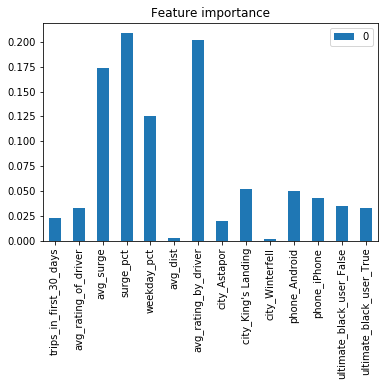

In [164]:
pd.DataFrame(rs_clf.best_estimator_.feature_importances_,index=list(X_train.columns)).plot(kind = "bar")
plt.title("Feature importance")
plt.show()

### lets try XGBOOST with default parameters 

In [189]:
import xgboost as xgb
model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7758154796371357

conclusion

* my approach was to build a model that can predict whether a customer will stay active from the date the customer signed up up till atleast above 150 days.
* I chose random forest for this as features were on quite varying scales and data seemed non linearly separable so thought random forest is the best choice 
* model got an accuracy of 0.77 model and precision for predicting whether a customer will be retained or not is 67% 
* when plotted the features importance customer belonging to which city wasn't important makes sense
* surge pct and avg surge turns out to be quite important features which means customers who are even ready to pay higher than the normal fare for their commute are more likely to be retained 
* average rating by the driver is also an important feature 
* weekday pct is quite important as well makes sense if people are using cabs more for work they are likely to do that in future as well 